# Lecture 7

## Numerical Differentiation 

The following was adpated from: http://gilgamesh.cheme.cmu.edu/doc/software/jacapo/9-numerics/9.1-numpy/9.2-integration.html#numerical-differentiation

numpy has a function called numpy.diff() that is similar to the one found in matlab. It calculates the differences between the elements in your list, and returns a list that is one element shorter, which makes it unsuitable for plotting the derivative of a function.

### Using loops to find finite difference derivatives

Loops in python are pretty slow (relatively speaking) but they are usually trivial to understand. In this script we show some simple ways to construct derivative vectors using loops. It is implied in these formulas that the data points are equally spaced.

 Forward difference took 0.0011670589447021 seconds
 Backward difference took 0.0009586811065674 seconds
 Centered difference took 0.0010323524475098 seconds


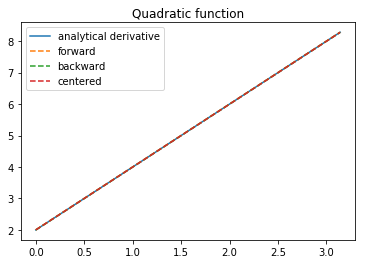

In [29]:
import numpy as np
import matplotlib.pylab as plt
from pylab import *
import time

'''
These are the brainless way to calculate numerical derivatives. They
work well for very smooth data. they are surprisingly fast even up to
10000 points in the vector.
'''

x = np.linspace(0,np.pi,1000)
y = x**2+2*x-5
dy_analytical = 2*x+2
'''
lets use a forward difference method:
that works up until the last point, where there is not
a forward difference to use. there, we use a backward difference.
'''

tf1 = time.time()
dyf = [0.0]*len(x)
for i in range(len(y)-1):
    dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
#set last element by backwards difference
dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

print (' Forward difference took %1.16f seconds' % (time.time() - tf1))

'''and now a backwards difference'''
tb1 = time.time()
dyb = [0.0]*len(x)
#set first element by forward difference
dyb[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)):
    dyb[i] = (y[i] - y[i-1])/(x[i]-x[i-1])

print (' Backward difference took %1.16f seconds' % (time.time() - tb1))

'''and now, a centered formula'''
tc1 = time.time()
dyc = [0.0]*len(x)
dyc[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)-1):
    dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

print (' Centered difference took %1.16f seconds' % (time.time() - tc1))

#plot(x,y)
plt.plot(x,dy_analytical,label='analytical derivative')
plt.plot(x,dyf,'--',label='forward')
plt.plot(x,dyb,'--',label='backward')
plt.plot(x,dyc,'--',label='centered')
plt.title('Quadratic function')

plt.legend(loc='upper left')
#savefig('9.2.1-simple-diffs.png')
#show()

 Forward difference took 0.0010466575622559 seconds
 Backward difference took 0.0009810924530029 seconds
 Centered difference took 0.0013179779052734 seconds


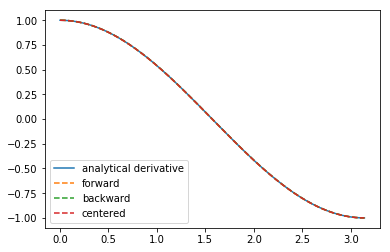

In [30]:
'''
These are the brainless way to calculate numerical derivatives. They
work well for very smooth data. they are surprisingly fast even up to
10000 points in the vector.
'''

x = np.linspace(0,np.pi,1000)
y = np.sin(x)
dy_analytical = np.cos(x)
'''
lets use a forward difference method:
that works up until the last point, where there is not
a forward difference to use. there, we use a backward difference.
'''

tf1 = time.time()
dyf = [0.0]*len(x)
for i in range(len(y)-1):
    dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
#set last element by backwards difference
dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

print (' Forward difference took %1.16f seconds' % (time.time() - tf1))

'''and now a backwards difference'''
tb1 = time.time()
dyb = [0.0]*len(x)
#set first element by forward difference
dyb[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)):
    dyb[i] = (y[i] - y[i-1])/(x[i]-x[i-1])

print (' Backward difference took %1.16f seconds' % (time.time() - tb1))

'''and now, a centered formula'''
tc1 = time.time()
dyc = [0.0]*len(x)
dyc[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)-1):
    dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

print (' Centered difference took %1.16f seconds' % (time.time() - tc1))


# the centered formula is the most accurate formula here
%matplotlib inline

#plot(x,y)
plt.plot(x,dy_analytical,label='analytical derivative')
plt.plot(x,dyf,'--',label='forward')
plt.plot(x,dyb,'--',label='backward')
plt.plot(x,dyc,'--',label='centered')

plt.legend(loc='lower left')
#savefig('9.2.1-simple-diffs.png')
#show()

Let's compute the errors of each algorithm

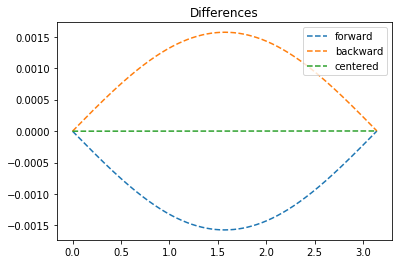

In [31]:
diff_dyf = dyf-dy_analytical
diff_dyb = dyb-dy_analytical
diff_dyc = dyc-dy_analytical

plt.plot(x,diff_dyf,'--',label='forward')
plt.plot(x,diff_dyb,'--',label='backward')
plt.plot(x,diff_dyc,'--',label='centered')
plt.title('Differences')

legend(loc='upper right')
plt.show()

 Forward difference took 0.0010523796081543 seconds
 Backward difference took 0.0010614395141602 seconds
 Centered difference took 0.0011756420135498 seconds


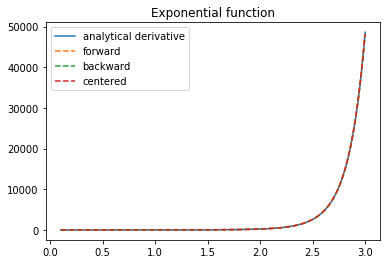

In [32]:
'''
These are the brainless way to calculate numerical derivatives. They
work well for very smooth data. they are surprisingly fast even up to
10000 points in the vector.
'''

x = np.linspace(0.1,3,1000)
y = np.exp(x**2)
dy_analytical = 2*x*np.exp(x**2)
'''
lets use a forward difference method:
that works up until the last point, where there is not
a forward difference to use. there, we use a backward difference.
'''

tf1 = time.time()
dyf = [0.0]*len(x)
for i in range(len(y)-1):
    dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
#set last element by backwards difference
dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

print (' Forward difference took %1.16f seconds' % (time.time() - tf1))

'''and now a backwards difference'''
tb1 = time.time()
dyb = [0.0]*len(x)
#set first element by forward difference
dyb[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)):
    dyb[i] = (y[i] - y[i-1])/(x[i]-x[i-1])

print (' Backward difference took %1.16f seconds' % (time.time() - tb1))

'''and now, a centered formula'''
tc1 = time.time()
dyc = [0.0]*len(x)
dyc[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)-1):
    dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

print (' Centered difference took %1.16f seconds' % (time.time() - tc1))


#plot(x,y)
plt.plot(x,dy_analytical,label='analytical derivative')
plt.plot(x,dyf,'--',label='forward')
plt.plot(x,dyb,'--',label='backward')
plt.plot(x,dyc,'--',label='centered')
plt.title('Exponential function')

legend(loc='upper left')
#savefig('9.2.1-simple-diffs.png')
#show()

Plot the fractional error of the derivatives

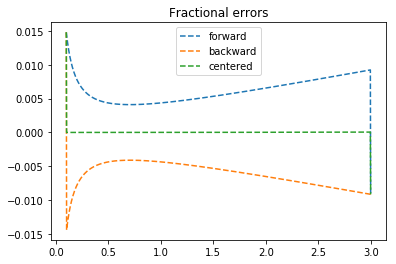

In [33]:
r_dyf = dyf/dy_analytical-1
r_dyb = dyb/dy_analytical-1
r_dyc = dyc/dy_analytical-1

plt.plot(x,r_dyf,'--',label='forward')
plt.plot(x,r_dyb,'--',label='backward')
plt.plot(x,r_dyc,'--',label='centered')
plt.title('Fractional errors')

legend(loc='upper center')
plt.show()


### Derivatives in the presense of noise

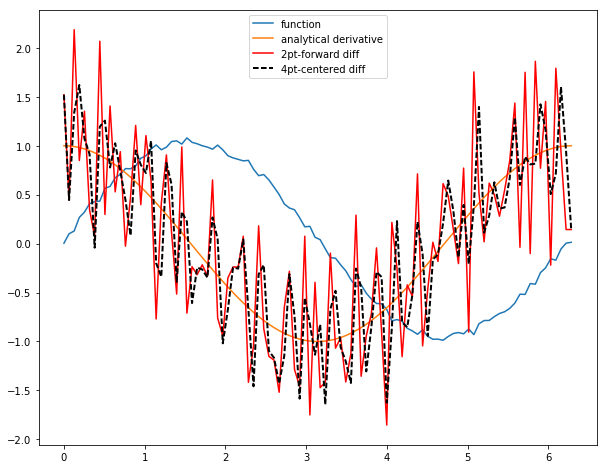

In [34]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + 0.1*np.random.random(size=x.shape)
dy_analytical = np.cos(x)

#2-point formula
dyf = [0.0]*len(x)
for i in range(len(y)-1):
    dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
#set last element by backwards difference
dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

'''
calculate dy by 4-point center differencing using array slices

\frac{y[i-2] - 8y[i-1] + 8[i+1] - y[i+2]}{12h}

y[0] and y[1] must be defined by lower order methods
and y[-1] and y[-2] must be defined by lower order methods
'''

dy = np.zeros(y.shape,np.float) #we know it will be this size
h = x[1]-x[0] #this assumes the points are evenely spaced!
dy[2:-2] = (y[0:-4] - 8*y[1:-3] + 8*y[3:-1] - y[4:])/(12.*h)

dy[0] = (y[1]-y[0])/(x[1]-x[0])
dy[1] = (y[2]-y[1])/(x[2]-x[1])
dy[-2] = (y[-2] - y[-3])/(x[-2] - x[-3])
dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

fg3 = plt.figure(figsize=(10,8))
plt.plot(x,y,label='function')
plt.plot(x,dy_analytical,label='analytical derivative')
plt.plot(x,dyf,'r-',label='2pt-forward diff')
plt.plot(x,dy,'k--',lw=2,label='4pt-centered diff')

plt.legend(loc='upper center')